# Pet adoption problem

I am going to use random forest classifier to solve this problem

In [1]:
#Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
 #importing relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = None
pd.set_option("max_rows", None)
sns.set(style='whitegrid')

In [3]:
pet=pd.read_csv('train.csv',encoding = "ISO-8859-1")
test=pd.read_csv('test.csv',encoding = "ISO-8859-1")

In [4]:
pet.shape

(18834, 11)

In [5]:
pet.head()

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category
0,ANSL_69903,2016-07-10 00:00:00,2016-09-21 16:25:00,2.0,Brown Tabby,0.80,7.78,13,9,0.0,1
1,ANSL_66892,2013-11-21 00:00:00,2018-12-27 17:47:00,1.0,White,0.72,14.19,13,9,0.0,2
2,ANSL_69750,2014-09-28 00:00:00,2016-10-19 08:24:00,NaN,Brown,0.15,40.90,15,4,2.0,4
3,ANSL_71623,2016-12-31 00:00:00,2019-01-25 18:30:00,1.0,White,0.62,17.82,0,1,0.0,2
4,ANSL_57969,2017-09-28 00:00:00,2017-11-19 09:38:00,2.0,Black,0.50,11.06,18,4,0.0,1


In [6]:
pet.isnull().sum(axis=0)

pet_id               0
issue_date           0
listing_date         0
condition         1477
color_type           0
length(m)            0
height(cm)           0
X1                   0
X2                   0
breed_category       0
pet_category         0
dtype: int64

In [7]:
pet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18834 entries, 0 to 18833
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   pet_id          18834 non-null  object 
 1   issue_date      18834 non-null  object 
 2   listing_date    18834 non-null  object 
 3   condition       17357 non-null  float64
 4   color_type      18834 non-null  object 
 5   length(m)       18834 non-null  float64
 6   height(cm)      18834 non-null  float64
 7   X1              18834 non-null  int64  
 8   X2              18834 non-null  int64  
 9   breed_category  18834 non-null  float64
 10  pet_category    18834 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 1.6+ MB


In [8]:
pet['condition']=pet['condition'].astype(float)

In [9]:
pet.describe()

,condition,length(m),height(cm),X1,X2,breed_category,pet_category
count,17357.000000,18834.000000,18834.000000,18834.000000,18834.000000,18834.000000,18834.000000
mean,0.883390,0.502636,27.448832,5.369598,4.577307,0.600563,1.709143
std,0.770434,0.288705,13.019781,6.572366,3.517763,0.629883,0.717919
min,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.250000,16.172500,0.000000,1.000000,0.000000,1.000000
50%,1.000000,0.500000,27.340000,0.000000,4.000000,1.000000,2.000000
75%,1.000000,0.760000,38.890000,13.000000,9.000000,1.000000,2.000000
max,2.000000,1.000000,50.000000,19.000000,9.000000,2.000000,4.000000


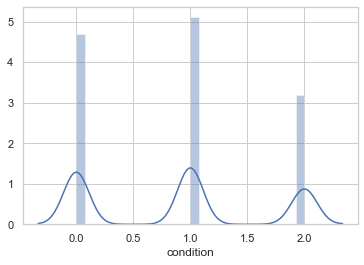

In [10]:
sns.distplot(pet['condition'])

In [11]:
pet['condition'].value_counts()

1.0    6819
0.0    6281
2.0    4257
Name: condition, dtype: int64

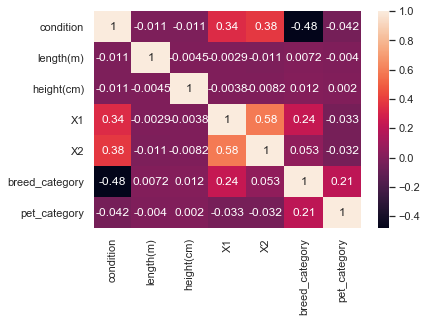

In [12]:
sns.heatmap(pet.corr(),annot=True)

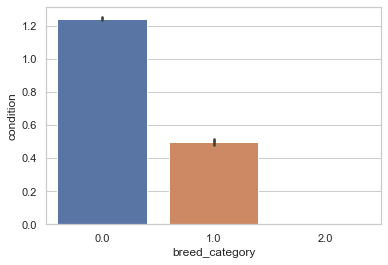

In [13]:
sns.barplot(pet['breed_category'],pet['condition'])

In [14]:
pet['breed_category'].value_counts()

0.0    9000
1.0    8357
2.0    1477
Name: breed_category, dtype: int64

In [15]:
pet.groupby(['breed_category','condition']).count()

pet_id  issue_date  listing_date  color_type  \
breed_category condition                                                 
0.0            1.0          6819        6819          6819        6819   
               2.0          2181        2181          2181        2181   
1.0            0.0          6281        6281          6281        6281   
               2.0          2076        2076          2076        2076   

                          length(m)  height(cm)    X1    X2  pet_category  
breed_category condition                                                   
0.0            1.0             6819        6819  6819  6819          6819  
               2.0             2181        2181  2181  2181          2181  
1.0            0.0             6281        6281  6281  6281          6281  
               2.0             2076        2076  2076  2076          2076

In [16]:
pet.loc[pet['breed_category']==2,:].isnull().sum(axis=0)

pet_id               0
issue_date           0
listing_date         0
condition         1477
color_type           0
length(m)            0
height(cm)           0
X1                   0
X2                   0
breed_category       0
pet_category         0
dtype: int64

If the breed category is 2 then we have condition is missing.
We can impute the condition with a new value which stands out wit all existing conditions and convert it to the categorical variables

In [17]:
pet['condition']=pet['condition'].fillna(3.0)

In [18]:
#converting datetime type
pet['issue_date']=pd.to_datetime(pet['issue_date'])
pet['listing_date']=pd.to_datetime(pet['listing_date'])

In [19]:
#creating new features using dates
pet['issue_year']= pd.DatetimeIndex(pet['issue_date']).year
pet['issue_month']= pd.DatetimeIndex(pet['issue_date']).month
pet['issue_day']= pd.DatetimeIndex(pet['issue_date']).day
pet['listing_year']= pd.DatetimeIndex(pet['listing_date']).year
pet['listing_month']= pd.DatetimeIndex(pet['listing_date']).month
pet['listing_day']= pd.DatetimeIndex(pet['listing_date']).day
pet=pet.drop(['issue_date','listing_date'],axis=1)





In [20]:
pet.head()

,pet_id,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category,issue_year,issue_month,issue_day,listing_year,listing_month,listing_day
0,ANSL_69903,2.0,Brown Tabby,0.80,7.78,13,9,0.0,1,2016,7,10,2016,9,21
1,ANSL_66892,1.0,White,0.72,14.19,13,9,0.0,2,2013,11,21,2018,12,27
2,ANSL_69750,3.0,Brown,0.15,40.90,15,4,2.0,4,2014,9,28,2016,10,19
3,ANSL_71623,1.0,White,0.62,17.82,0,1,0.0,2,2016,12,31,2019,1,25
4,ANSL_57969,2.0,Black,0.50,11.06,18,4,0.0,1,2017,9,28,2017,11,19


In [21]:
pet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18834 entries, 0 to 18833
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   pet_id          18834 non-null  object 
 1   condition       18834 non-null  float64
 2   color_type      18834 non-null  object 
 3   length(m)       18834 non-null  float64
 4   height(cm)      18834 non-null  float64
 5   X1              18834 non-null  int64  
 6   X2              18834 non-null  int64  
 7   breed_category  18834 non-null  float64
 8   pet_category    18834 non-null  int64  
 9   issue_year      18834 non-null  int64  
 10  issue_month     18834 non-null  int64  
 11  issue_day       18834 non-null  int64  
 12  listing_year    18834 non-null  int64  
 13  listing_month   18834 non-null  int64  
 14  listing_day     18834 non-null  int64  
dtypes: float64(4), int64(9), object(2)
memory usage: 2.2+ MB


In [22]:
from sklearn.model_selection import train_test_split

In [23]:
pet1=pet.drop('pet_id',axis=1)

In [24]:
y=pet1[['pet_category']]
X=pet1.drop(['pet_category','breed_category'],axis=1)

In [25]:
X.head()

,condition,color_type,length(m),height(cm),X1,X2,issue_year,issue_month,issue_day,listing_year,listing_month,listing_day
0,2.0,Brown Tabby,0.80,7.78,13,9,2016,7,10,2016,9,21
1,1.0,White,0.72,14.19,13,9,2013,11,21,2018,12,27
2,3.0,Brown,0.15,40.90,15,4,2014,9,28,2016,10,19
3,1.0,White,0.62,17.82,0,1,2016,12,31,2019,1,25
4,2.0,Black,0.50,11.06,18,4,2017,9,28,2017,11,19


In [26]:
y.head()

,pet_category
0,1
1,2
2,4
3,2
4,1


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)



In [28]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
X_train['color_type']=le.fit_transform(X_train['color_type'])
X_test['color_type']=le.fit_transform(X_test['color_type'])

In [29]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13183 entries, 6639 to 13151
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   condition      13183 non-null  float64
 1   color_type     13183 non-null  int64  
 2   length(m)      13183 non-null  float64
 3   height(cm)     13183 non-null  float64
 4   X1             13183 non-null  int64  
 5   X2             13183 non-null  int64  
 6   issue_year     13183 non-null  int64  
 7   issue_month    13183 non-null  int64  
 8   issue_day      13183 non-null  int64  
 9   listing_year   13183 non-null  int64  
 10  listing_month  13183 non-null  int64  
 11  listing_day    13183 non-null  int64  
dtypes: float64(3), int64(9)
memory usage: 1.3 MB


In [30]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier


# Running the random forest with default parameters.
rfc = RandomForestClassifier(random_state=57)

In [31]:
# fit
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=57, verbose=0,
                       warm_start=False)

In [32]:
# Making predictions
predictions = rfc.predict(X_test)
pred=pd.DataFrame(predictions)

In [34]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [35]:
print(accuracy_score(y_test,predictions))

0.7021766059104583


In [36]:
#Let's check the report of our default model
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.08      0.15        25
           1       0.62      0.60      0.61      2135
           2       0.74      0.77      0.75      3191
           4       0.90      0.75      0.82       300

    accuracy                           0.70      5651
   macro avg       0.81      0.55      0.58      5651
weighted avg       0.70      0.70      0.70      5651



# Transforming test set 

In [37]:
test.shape

(8072, 9)

In [38]:
test.head()

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2
0,ANSL_75005,2005-08-17 00:00:00,2017-09-07 15:35:00,0.0,Black,0.87,42.73,0,7
1,ANSL_76663,2018-11-15 00:00:00,2019-05-08 17:24:00,1.0,Orange Tabby,0.06,6.71,0,1
2,ANSL_58259,2012-10-11 00:00:00,2018-04-02 16:51:00,1.0,Black,0.24,41.21,0,7
3,ANSL_67171,2015-02-13 00:00:00,2018-04-06 07:25:00,1.0,Black,0.29,8.46,7,1
4,ANSL_72871,2017-01-18 00:00:00,2018-04-26 13:42:00,1.0,Brown,0.71,30.92,0,7


In [39]:
test.isnull().sum(axis=0)

pet_id            0
issue_date        0
listing_date      0
condition       619
color_type        0
length(m)         0
height(cm)        0
X1                0
X2                0
dtype: int64

In [40]:
test['condition']=test['condition'].fillna(3.0)

In [41]:
test['color_type']=le.fit_transform(test['color_type'])

In [42]:
test['issue_year']= pd.DatetimeIndex(test['issue_date']).year
test['issue_month']= pd.DatetimeIndex(test['issue_date']).month
test['issue_day']= pd.DatetimeIndex(test['issue_date']).day
test['listing_year']= pd.DatetimeIndex(test['listing_date']).year
test['listing_month']= pd.DatetimeIndex(test['listing_date']).month
test['listing_day']= pd.DatetimeIndex(test['listing_date']).day



In [43]:
test.head()

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2,issue_year,issue_month,issue_day,listing_year,listing_month,listing_day
0,ANSL_75005,2005-08-17 00:00:00,2017-09-07 15:35:00,0.0,2,0.87,42.73,0,7,2005,8,17,2017,9,7
1,ANSL_76663,2018-11-15 00:00:00,2019-05-08 17:24:00,1.0,36,0.06,6.71,0,1,2018,11,15,2019,5,8
2,ANSL_58259,2012-10-11 00:00:00,2018-04-02 16:51:00,1.0,2,0.24,41.21,0,7,2012,10,11,2018,4,2
3,ANSL_67171,2015-02-13 00:00:00,2018-04-06 07:25:00,1.0,2,0.29,8.46,7,1,2015,2,13,2018,4,6
4,ANSL_72871,2017-01-18 00:00:00,2018-04-26 13:42:00,1.0,14,0.71,30.92,0,7,2017,1,18,2018,4,26


In [44]:
test=test.drop(['issue_date','listing_date'],axis=1)

In [45]:
test1=test.iloc[:,1:]

In [46]:
X_test.head()

,condition,color_type,length(m),height(cm),X1,X2,issue_year,issue_month,issue_day,listing_year,listing_month,listing_day
18327,0.0,46,0.36,47.37,7,1,2017,9,10,2018,6,4
16483,0.0,40,0.06,44.79,0,1,2016,2,25,2016,9,1
5868,0.0,2,0.03,17.50,0,7,2011,1,19,2019,2,9
7261,2.0,17,0.24,44.08,0,1,2018,8,20,2018,11,8
17244,1.0,23,0.36,35.31,0,1,2016,8,29,2017,9,30


In [47]:
sample=pd.DataFrame(rfc.predict(test.iloc[:,1:]))

In [48]:
sample.columns=['pet_category']
sample['pet_id']=test['pet_id']

Now predicting breed_category

In [49]:
pet1=pet.drop('pet_id',axis=1)

y=pet1[['breed_category']]
X=pet1.drop(['pet_category','breed_category'],axis=1)



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)



from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
X_train['color_type']=le.fit_transform(X_train['color_type'])
X_test['color_type']=le.fit_transform(X_test['color_type'])



# Importing XGboost classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

# Running the random forest with default parameters.
rfc = RandomForestClassifier(n_estimators=200)

# fit
rfc.fit(X_train,y_train)

# Making predictions
predictions = rfc.predict(X_test)

pred=pd.DataFrame(predictions)

pred


print(accuracy_score(y_test,predictions))

#Let's check the report of our default model
print(classification_report(y_test,predictions))

0.8920545036276765
              precision    recall  f1-score   support

         0.0       0.88      0.90      0.89      2699
         1.0       0.89      0.86      0.88      2508
         2.0       1.00      1.00      1.00       444

    accuracy                           0.89      5651
   macro avg       0.92      0.92      0.92      5651
weighted avg       0.89      0.89      0.89      5651



In [50]:
test1=test.iloc[:,1:]


In [51]:
sample['breed_category']=rfc.predict(test1)

In [52]:
sample=sample[['pet_id','breed_category','pet_category']]

In [53]:
sample.to_csv('sample.csv',index=False)